## Topic Modeling and Sentiment Analysis on Listing Reviews

This section aims to preform sentiment analysis on the airbnb listing reviews to predict review ratings. We also use topic modeling techniques to summarize the listing reviews so that hosts can easily view what topics are often talked about with their listing. 

Inspiration 

- https://cs229.stanford.edu/proj2018/report/122.pdf
- https://towardsdatascience.com/sentiment-analysis-on-amazon-reviews-45cd169447ac
- https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2
- https://towardsdatascience.com/topic-modeling-with-nlp-on-amazon-reviews-an-application-of-latent-dirichlet-allocation-lda-ae42a4c8b369
- https://medium.com/data-science-lab-spring-2021/amazon-review-rating-prediction-with-nlp-28a4acdd4352

### Import Libraries 

In [42]:
import pandas as pd
import seaborn as sns
import nltk

### Load Datasets

#### The datasets are imported from - http://insideairbnb.com/get-the-data.html

1. 02 June, 2021 	New York City 	**listings.csv.gz** 	Detailed Listings data for New York City
2. 02 June, 2021 	New York City 	**calendar.csv.gz** 	Detailed Calendar Data for listings in New York City
3. 02 June, 2021 	New York City 	**reviews.csv.gz** 	    Detailed Review Data for listings in New York City
4. 02 June, 2021 	New York City 	**listings.csv** 	    Summary information and metrics for listings in New York City   (good for visualisations).
5. 02 June, 2021 	New York City 	**reviews.csv** 	    Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).

In [5]:
listings = pd.read_csv('datasets/listings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,2021-05-04,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,2014-01-02,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,2020-09-25,3.61,1,246


In [6]:
listings_d = pd.read_csv('datasets/listings_all.csv')
listings_d.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210602135139,2021-06-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210602135139,2021-06-06,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.72,4.64,NaN,f,1,1,0,0,5.16
2,5121,https://www.airbnb.com/rooms/5121,20210602135139,2021-06-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,1,0,1,0,0.56
3,5136,https://www.airbnb.com/rooms/5136,20210602135139,2021-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.00,5.00,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20210602135139,2021-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.39,4.86,4.34,NaN,f,1,0,1,0,3.61


In [7]:
review_scores = listings_d[["id","name","host_identity_verified","availability_365","number_of_reviews","review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
                "review_scores_location", "review_scores_value"]]

In [ ]:
review_scores

In [8]:
review_scores.isnull().sum() #number of NAs per columns 

id                                 0
name                              14
host_identity_verified            26
availability_365                   0
number_of_reviews                  0
review_scores_rating            9458
review_scores_accuracy         10124
review_scores_cleanliness      10113
review_scores_checkin          10133
review_scores_communication    10122
review_scores_location         10137
review_scores_value            10137
dtype: int64

In [9]:
review_scores[review_scores["review_scores_rating"].isnull()].head()

,id,name,host_identity_verified,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),t,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,7750,2 Furnished bedrooms next to Central Park,t,178,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,11943,Country space in the city,f,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,45935,Room in Beautiful Townhouse.,f,83,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,51438,1 Bedroom in 2 Bdrm Apt- Upper East,t,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
reviews = pd.read_csv('datasets/reviews.csv')
reviews.head()

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25


In [11]:
reviews_d = pd.read_csv('datasets/reviews_all.csv')
reviews_d.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


We will primarily be using the reviews_d dataframe and the listings all data frame to cross reference the review ratings and customer reviews 

### Data Cleaning

We will get rid of all of the listings with zero number of reviews. froms listing_d 

establish relationship from reviews_d

In [12]:
# preform data cleaning

In [30]:
reviews = reviews_d["comments"]

We will remove punctuation, stop words, and convert words to stems to gain better preformance from the models. 

In [44]:
reviews[0]

'Notre séjour de trois nuits.\r\nNous avons apprécier L\'appartement qui est très bien situé. Agréable, propre et bien soigné. C\'est idéal pour une famille de 3 ou 4 personnes.\r\nPetits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide.  A part ces petits détails notre court séjour c\'est bien passé. \r\nSi j\'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à "The Midtown Castle"\r\nJean\r\nPossession - Ile de La Réunion\r\n'

In [32]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)

# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

0         Notre séjour de trois nuits.\r\nNous avons app...
1                                         Great experience.
2         I've stayed with my friend at the Midtown Cast...
3         We've been staying here for about 9 nights, en...
4         We had a wonderful stay at Jennifer's charming...
                                ...                        
821853                          Very pleasant surroundings.
821854        Great stay, amazing hospitality and location!
821855    Outstanding customer service!  Kitty is awesom...
821856    Great place to stay at very kind and heparin host
821857    Ecxelente apartamento y host muy amable y disp...
Name: comments, Length: 821858, dtype: object

<AxesSubplot:xlabel='count', ylabel='listing_id'>

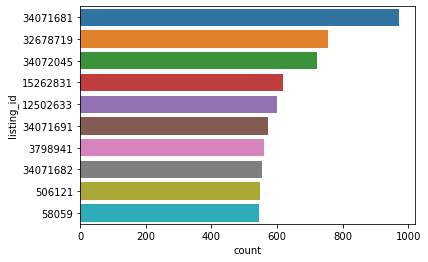

In [14]:
sns.countplot(data = reviews_d, y = "listing_id", order=reviews_d.listing_id.value_counts().iloc[:10].index)

Shows listing ids with the most reviews

In [15]:
reviews_d.listing_id.value_counts().describe() #summary statistics of the counts of reviews per listing 

count    26772.000000
mean        30.698416
std         54.342279
min          1.000000
25%          2.000000
50%          8.000000
75%         33.000000
max        972.000000
Name: listing_id, dtype: float64

The summary statistics shows a total of 26772 airbnb listings. Each listing has on average 30 reviews, with a standard deviation of 54 which is noticably high indicating listings have great dispertion in their amount of reviews. 

In [16]:
review_counts = reviews_d.listing_id.value_counts()

In [17]:
review_ids = list(review_counts[:20].index)
review_ids = pd.DataFrame(review_ids)
review_ids.columns = ["id"]

In [18]:
df_most_reviews = pd.merge(listings_d,review_ids,left_on='id',right_on='id')
df_most_reviews

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,58059,https://www.airbnb.com/rooms/58059,20210602135139,2021-06-04,Private Room on Historic Sugar Hill,"Close to Times Square!!! Bars, bakeries, cafés...","Architectural beauty, historic, well developed...",https://a0.muscache.com/pictures/65745077/052f...,277379,https://www.airbnb.com/users/show/277379,...,4.81,4.65,4.70,NaN,f,2,0,2,0,4.73
1,476983,https://www.airbnb.com/rooms/476983,20210602135139,2021-06-06,"Private Room in Spacious Quiet Apt., Elevator ...",Come stay on Historic Sugar Hill in Manhattan!...,"Neo-gothic architecture, Historic, Mecca of Af...",https://a0.muscache.com/pictures/65745525/44a4...,277379,https://www.airbnb.com/users/show/277379,...,4.80,4.65,4.71,NaN,f,2,0,2,0,4.74
2,506121,https://www.airbnb.com/rooms/506121,20210602135139,2021-06-06,Cozy Room in Lively East Village,Please DO NOT SUBMIT A BOOKING REQUEST WITHOUT...,"The East Village is a vibrant, energetic neigh...",https://a0.muscache.com/pictures/14694280/0760...,2267153,https://www.airbnb.com/users/show/2267153,...,4.99,4.95,4.91,NaN,f,4,1,3,0,5.77
3,546383,https://www.airbnb.com/rooms/546383,20210602135139,2021-06-05,My Little Guest Room in Flushing,"(**IN JULY and AUGUST ONLY, due to safety issu...",Flushing is the biggest China town in all of N...,https://a0.muscache.com/pictures/27127830/2fcb...,2680820,https://www.airbnb.com/users/show/2680820,...,4.94,4.56,4.80,NaN,f,3,1,2,0,5.49
4,945297,https://www.airbnb.com/rooms/945297,20210602135139,2021-06-04,East Village Gay Friendly Dbl Room,Bedroom in the heart of the trendiest neighbor...,The East Village is my favorite neighborhood! ...,https://a0.muscache.com/pictures/4030a8f7-eeb5...,5074654,https://www.airbnb.com/users/show/5074654,...,4.92,4.88,4.69,NaN,t,1,0,1,0,4.99
5,1217318,https://www.airbnb.com/rooms/1217318,20210602135139,2021-06-04,Williamsburg Penthouse Hideaway,The north bedroom in my 3-bed penthouse apartm...,Williamsburg is amazing. Anyone who has lived ...,https://a0.muscache.com/pictures/59210944/5a91...,6642777,https://www.airbnb.com/users/show/6642777,...,4.79,4.83,4.60,NaN,f,2,0,2,0,6.89
6,2968070,https://www.airbnb.com/rooms/2968070,20210602135139,2021-06-05,Near Times Square and Hell's Kitchen,The main attraction is the location; the build...,You are in the heart of New York City – easy t...,https://a0.muscache.com/pictures/256de43a-bf4b...,14380456,https://www.airbnb.com/users/show/14380456,...,4.91,4.97,4.78,NaN,t,1,0,1,0,5.78
7,3798941,https://www.airbnb.com/rooms/3798941,20210602135139,2021-06-04,Williamsburg Penthouse Guestroom,The west bedroom in my 3-bed penthouse apartme...,Williamsburg is amazing. Anyone who has lived ...,https://a0.muscache.com/pictures/56801928/7938...,6642777,https://www.airbnb.com/users/show/6642777,...,4.81,4.81,4.65,NaN,f,2,0,2,0,7.12
8,6037761,https://www.airbnb.com/rooms/6037761,20210602135139,2021-06-06,Spacious Room in East Village Architect’s Home,Apartment share on a quiet street in a lively ...,The East Village is socially and culturally di...,https://a0.muscache.com/pictures/1793a6af-f3cb...,7256281,https://www.airbnb.com/users/show/7256281,...,4.99,4.97,4.86,NaN,t,1,1,0,0,7.17
9,8002080,https://www.airbnb.com/rooms/8002080,20210602135139,2021-06-05,Luxury suite.,"Located in Brooklyn, safe, easy to park, conve...",The room is located in quiet and safe community.,https://a0.muscache.com/pictures/9f2c62d7-9233...,42243297,https://www.airbnb.com/users/show/42243297,...,4.76,4.69,4.73,NaN,t,2,0,2,0,8.19


We observe the listings with the most reviews

In [19]:
len(review_counts[review_counts>30])

6964

## HuggingFaces Transformer Model

- DistBERT for sentiment analysis
- ? for topic modeling 

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [107]:
# tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
# model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [2]:
classifer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9998695850372314}]


In [33]:
reviews_lst = reviews[:10]

In [62]:
res = classifer(reviews[0:100].to_list())

In [63]:
for result in res:
    print(result)

{'label': 'NEGATIVE', 'score': 0.945614755153656}
{'label': 'POSITIVE', 'score': 0.9998787641525269}
{'label': 'POSITIVE', 'score': 0.999850869178772}
{'label': 'POSITIVE', 'score': 0.9994640946388245}
{'label': 'POSITIVE', 'score': 0.9998526573181152}
{'label': 'POSITIVE', 'score': 0.9998395442962646}
{'label': 'POSITIVE', 'score': 0.9998183846473694}
{'label': 'NEGATIVE', 'score': 0.7429993748664856}
{'label': 'POSITIVE', 'score': 0.9996311664581299}
{'label': 'POSITIVE', 'score': 0.9998045563697815}
{'label': 'POSITIVE', 'score': 0.9998481273651123}
{'label': 'POSITIVE', 'score': 0.9998801946640015}
{'label': 'POSITIVE', 'score': 0.9997875094413757}
{'label': 'NEGATIVE', 'score': 0.9897810220718384}
{'label': 'POSITIVE', 'score': 0.9998108744621277}
{'label': 'POSITIVE', 'score': 0.9998887777328491}
{'label': 'POSITIVE', 'score': 0.9998400211334229}
{'label': 'POSITIVE', 'score': 0.9997523427009583}
{'label': 'POSITIVE', 'score': 0.9998098015785217}
{'label': 'POSITIVE', 'score': 0.

## Other research questions:

Predicting Airbnb Listing Prices with separate features and past data?
- append features to dataset such as number of subways near by 
- number of top rated restuarants near by
- number of attractions near by 
- use metrics in determination of price of listing 

Can also allow users to input list of restrants and attrations and can find their location and give a list of listing that could be good options. 

Predict which real estate property to buy using real estate and airbnb data to find a property that will bring in the most profit?